### Задача: для курса чешской кроны за последние 3 года вывести различные статистические данные

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LinearRegression

In [27]:
exchange_rate = pd.read_excel('cz_cr.xlsx')

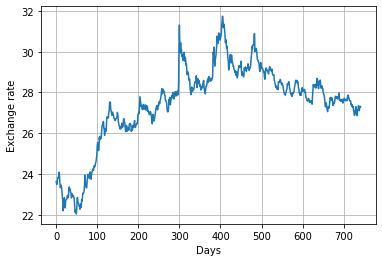

In [28]:
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Exchange rate')
plot_exchange = plt.plot(exchange_rate['curs'])

#### Статистические данные:

##### Так бы выглядел график, если бы курс кроны за данный срок начинался от минимального, а максимальный был бы 24.01.2020:

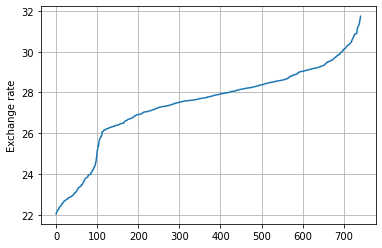

In [80]:
curs = exchange_rate['curs'].copy()
curs = curs.sort_values()
plt.grid(True)
plt.ylabel('Exchange rate')
sort_plot_exchange = plt.plot(curs.values)

##### Поиск значений курса кроны, лежащих в заданных пределах:

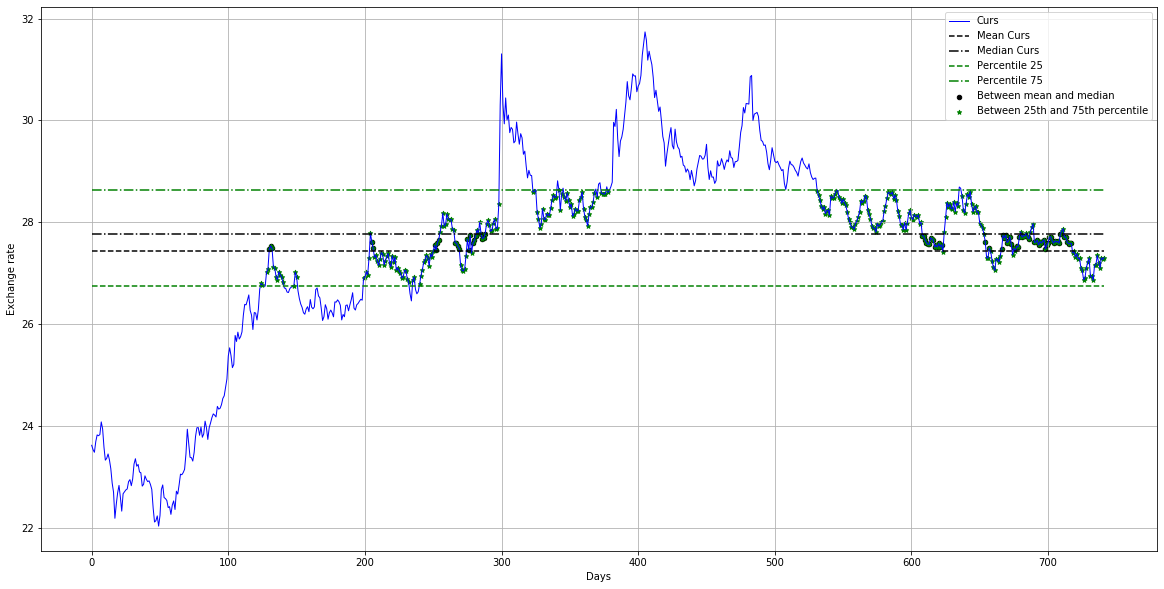

Значение медианы курса валют 27.781950000000002 
Среднее значение курса валют 27.449229380053907
Значение 25 перцентиля 26.754925 
Значение 75 перцентиля 28.63185


In [71]:
mean_exchange = np.zeros(len(exchange_rate))
med_exchange = np.zeros(len(exchange_rate))
perc_25_exchange = np.zeros(len(exchange_rate))
perc_75_exchange = np.zeros(len(exchange_rate))
mean = curs.mean()
median = curs.median()
perc_25 = np.percentile(curs, 25)
perc_75 = np.percentile(curs, 75)
for i in range(len(exchange_rate)):
    mean_exchange[i] = mean
    med_exchange[i] = median
    perc_25_exchange[i] = perc_25
    perc_75_exchange[i] = perc_75

d_med_mean = median - mean
x_axis_d_med_mean = []
y_axis_d_med_mean = []
for i in range(len(exchange_rate)):
    if d_med_mean >= 0:
        if ((exchange_rate['curs'][i] >= mean) and (exchange_rate['curs'][i] <= median)):
            x_axis_d_med_mean.append(i)
            y_axis_d_med_mean.append(exchange_rate['curs'][i])
    else:
        if ((exchange_rate['curs'][i] <= mean) and (exchange_rate['curs'][i] >= median)):
            x_axis_d_med_mean.append(i)
            y_axis_d_med_mean.append(exchange_rate['curs'][i])

x_axis_perc = []
y_axis_perc = []            
for i in range(len(exchange_rate)):
    if ((exchange_rate['curs'][i] >= perc_25) and (exchange_rate['curs'][i] <= perc_75)):
        x_axis_perc.append(i)
        y_axis_perc.append(exchange_rate['curs'][i])
            
            
x_axis = range(len(exchange_rate))
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Exchange rate')
plt.plot(exchange_rate['curs'], label = 'Curs', linestyle = 'solid', linewidth = 1, color = 'blue')
plt.plot(x_axis, mean_exchange, label = 'Mean Curs', linestyle = '--', color = 'black')
plt.plot(x_axis, med_exchange, label = 'Median Curs', linestyle = '-.', color = 'black')
plt.plot(x_axis, perc_25_exchange, label = 'Percentile 25', linestyle = '--', color = 'green')
plt.plot(x_axis, perc_75_exchange, label = 'Percentile 75', linestyle = '-.', color = 'green')
plt.scatter(x_axis_d_med_mean, y_axis_d_med_mean, s = 20, marker = 'o', color = 'black', label = 'Between mean and median')
plt.scatter(x_axis_perc, y_axis_perc, s = 20, marker = '*', color = 'green', label = 'Between 25th and 75th percentile')
plt.legend(loc = 'best')
plt.show()
print('Значение медианы курса валют {} \nСреднее значение курса валют {}'.format(median, mean))
print('Значение 25 перцентиля {} \nЗначение 75 перцентиля {}'.format(perc_25, perc_75))

##### Распределение отсортированного по возрастанию курса кроны относительно гауссова распределения (фильтр Гаусса):

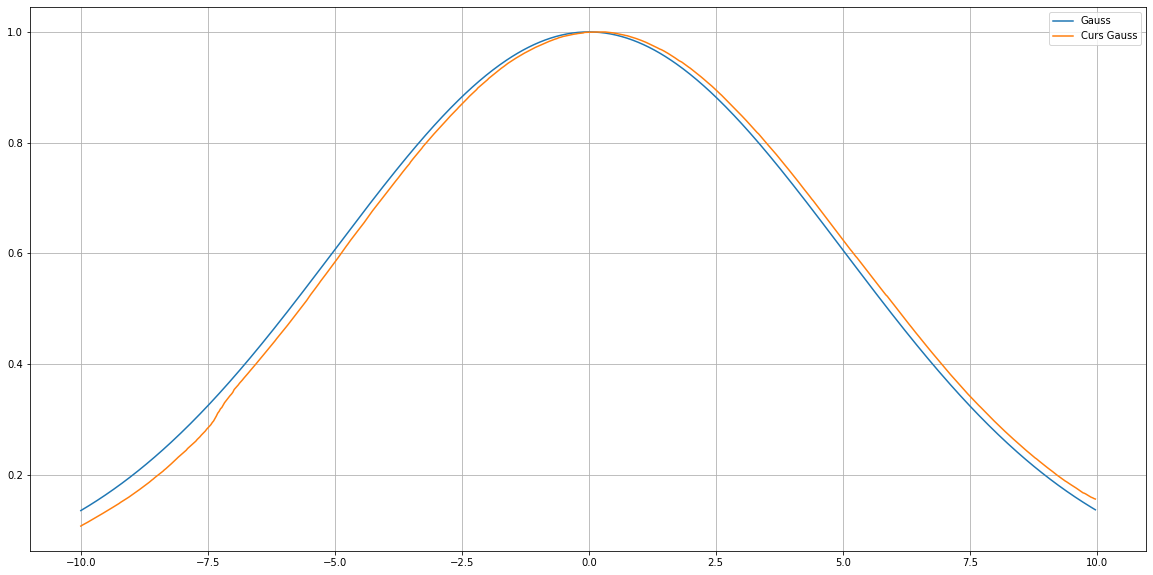

In [107]:
curs_values = curs.copy().values
curs_gauss = np.zeros(len(curs_values))
x_axis = np.arange(-10, 10, 20/len(curs_values))
gauss = norm.pdf(x_axis, 0, 5)
gauss = gauss/max(gauss)
for i in range(len(curs_values)):
    curs_gauss[i] = curs_values[i] * gauss[i]
curs_gauss = curs_gauss/max(curs_gauss)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(x_axis, gauss, label = 'Gauss')
plt.plot(x_axis, curs_gauss, label = 'Curs Gauss')
plt.legend()
plt.show()

##### Медианная фильтрация графика курса:

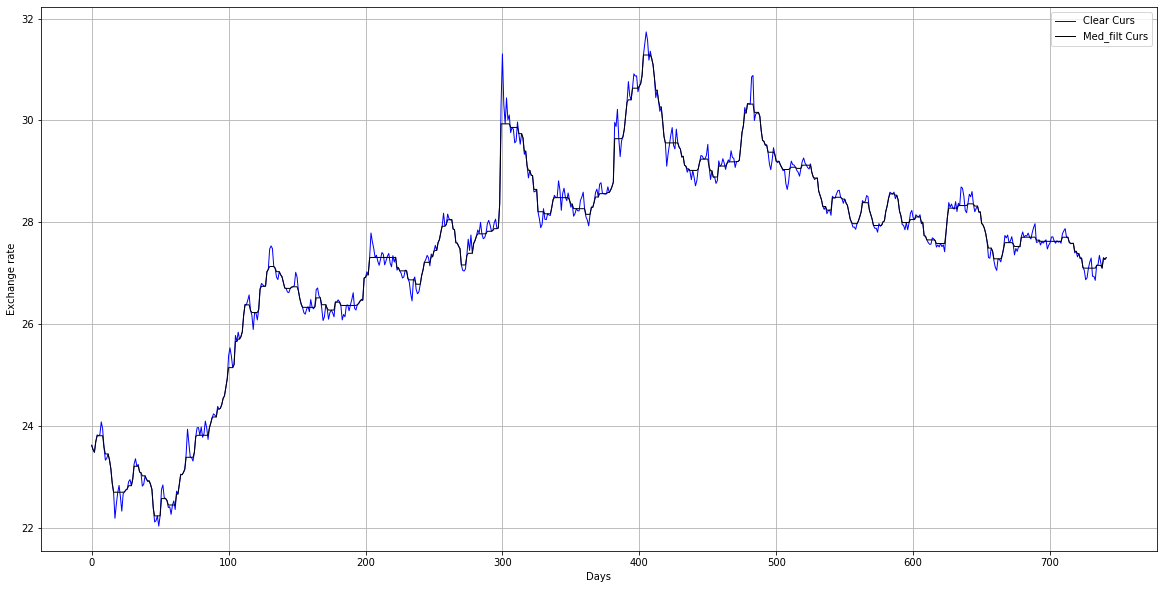

In [105]:
med_filter = exchange_rate['curs'].copy().values
k = 5 #окно фильтрации (нечетное число)
for i in range(k-2, len(med_filter)-k+1, 1):
    window = pd.Series(med_filter[i-k+2:i+k-1])
    med_filter[i] = window.median()

plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Exchange rate') 
plt.plot(exchange_rate['curs'], label = 'Clear Curs', linestyle = 'solid', linewidth = 1, color = 'blue')
plt.plot(med_filter, label = 'Med_filt Curs', linewidth = 1, color = 'black')
plt.legend()
plt.show()

##### Получение прогноза курса чешской кроны:

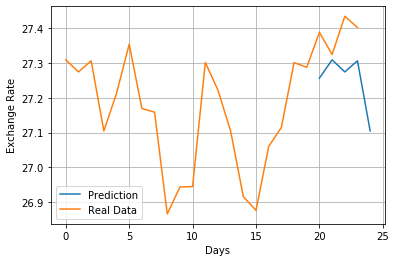

In [236]:
past = 20
future = 5
curs_learning = exchange_rate['curs'].copy().values
raw_data = []
for i in range(past, len(curs_learning) - future):
    block = curs_learning[i-past:i+future]
    raw_data.append(list(block))
past_columns = []
future_columns = []
for i in range(past):
    past_columns.append('past_{}'.format(i))
for i in range(future):
    future_columns.append('future_{}'.format(i))
training_df = pd.DataFrame(raw_data, columns = (past_columns+future_columns))
X_training = training_df[past_columns]
Y_training = training_df[future_columns]
linear_model = LinearRegression()
linear_model.fit(X_training, Y_training);
Data_for_prediction = list(curs_learning[len(curs_learning):len(curs_learning)-past-1:-1].reshape(1,20))
X_for_predict = pd.DataFrame(Data_for_prediction, columns = past_columns)
Y_prediction_real = linear_model.predict(X_for_predict)
Y_prediction_testing = linear_model.predict(X_training[-1:])
curs_learning_with_prediction_real = list(curs_learning) + list(Y_prediction_real[0])
curs_learning_with_prediction_test = list(curs_learning.copy())
curs_len = len(curs_learning_with_prediction_test)
for i in range(curs_len, curs_len-past-future):
    curs_learning_with_prediction_test[i] = Y_prediction_testing[-i]
x_real = range(past,past+future)
x_test = range(0,past+future-1)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Exchange Rate')
plt.plot(x_real, curs_learning_with_prediction_real[curs_len:curs_len-future:-1], label = 'Prediction')
plt.plot(x_test, curs_learning_with_prediction_test[curs_len:curs_len-past-future:-1], label = 'Real Data')
plt.legend()
plt.show()